In [18]:
import pandas as pd
import os.path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

In [85]:
dataset = pd.read_csv('../data/250117-chifflot2-p100.csv').pivot(index=['timestamp','domain'], columns='metric', values='measure')
dataset_keys = list(dataset.keys())
dataset_keys.remove('SMI_PSTATE')
dataset = dataset.astype({key:'float' for key in dataset_keys})
dataset.reset_index(inplace=True)

In [86]:
dataset

metric,timestamp,domain,DCGM_FI_DEV_APP_MEM_CLOCK,DCGM_FI_DEV_APP_SM_CLOCK,DCGM_FI_DEV_DEC_UTIL,DCGM_FI_DEV_ENC_UTIL,DCGM_FI_DEV_ENFORCED_POWER_LIMIT,DCGM_FI_DEV_FB_FREE,DCGM_FI_DEV_FB_USED,DCGM_FI_DEV_GPU_TEMP,...,SMI_FAN.SPEED,SMI_MEMORY.FREE,SMI_MEMORY.TOTAL,SMI_MEMORY.USED,SMI_POWER.DRAW,SMI_POWER.MAX_LIMIT,SMI_PSTATE,SMI_TEMPERATURE.GPU,SMI_UTILIZATION.GPU,SMI_UTILIZATION.MEMORY
0,0,GPU0,715.0,1189.0,0.0,0.0,250.0,16276.0,0.0,33.0,...,NaN,16276.0,16384.0,0.0,26.58,250.0,P0,33.0,0.0,0.0
1,0,GPU1,715.0,1189.0,0.0,0.0,250.0,16276.0,0.0,34.0,...,NaN,16276.0,16384.0,0.0,25.64,250.0,P0,34.0,0.0,0.0
2,0,global,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,GPU0,715.0,1189.0,0.0,0.0,250.0,16276.0,0.0,33.0,...,NaN,16276.0,16384.0,0.0,26.81,250.0,P0,33.0,0.0,0.0
4,5,GPU1,715.0,1189.0,0.0,0.0,250.0,16276.0,0.0,34.0,...,NaN,16276.0,16384.0,0.0,25.64,250.0,P0,34.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1861,GPU1,715.0,1189.0,0.0,0.0,250.0,16276.0,0.0,37.0,...,NaN,16276.0,16384.0,0.0,25.89,250.0,P0,36.0,0.0,0.0
1118,1861,global,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1119,1866,GPU0,715.0,1189.0,0.0,0.0,250.0,16276.0,0.0,36.0,...,NaN,16276.0,16384.0,0.0,26.81,250.0,P0,35.0,0.0,0.0
1120,1866,GPU1,715.0,1189.0,0.0,0.0,250.0,16276.0,0.0,37.0,...,NaN,16276.0,16384.0,0.0,25.89,250.0,P0,36.0,0.0,0.0


# Analysis

In [98]:
gpu_dataset = dataset.loc[dataset['domain'] != 'global']

In [110]:
sns.lineplot(data=gpu_dataset, x="PROF_SM_ACTIVE", y="SMI_UTILIZATION.GPU", hue="domain")

ValueError: Could not interpret value `PROF_SM_ACTIVE` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='timestamp', ylabel='IPMI_GPU1_TEMP'>

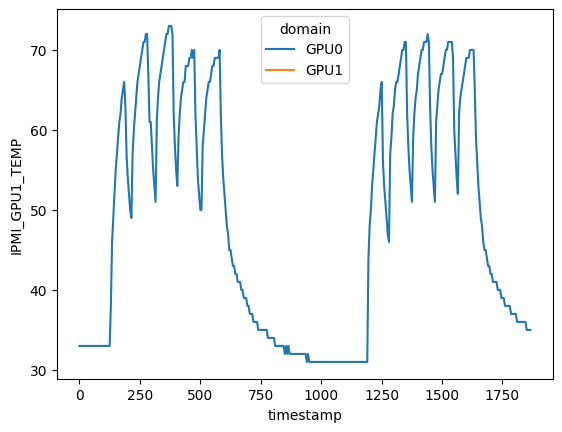

In [106]:
sns.lineplot(data=gpu_dataset, x="timestamp", y="IPMI_GPU1_TEMP", hue="domain")

<Axes: xlabel='SMI_TEMPERATURE.GPU', ylabel='IPMI_GPU1_TEMP'>

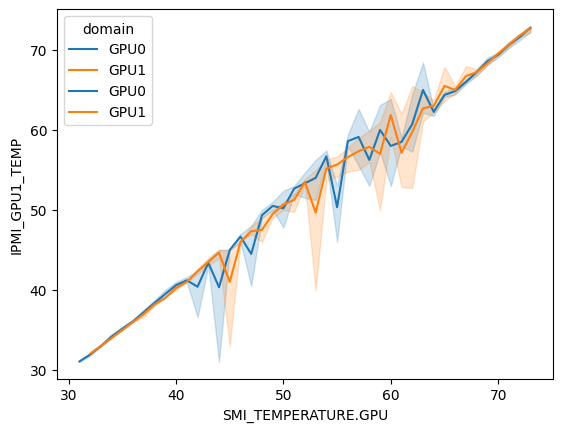

In [101]:
sns.lineplot(data=gpu_dataset, x="SMI_TEMPERATURE.GPU", y="IPMI_GPU1_TEMP", hue="domain")
sns.lineplot(data=gpu_dataset, x="SMI_TEMPERATURE.GPU", y="IPMI_GPU8_TEMP", hue="domain")

<Axes: xlabel='IPMI_GPU1_TEMP', ylabel='SMI_UTILIZATION.GPU'>

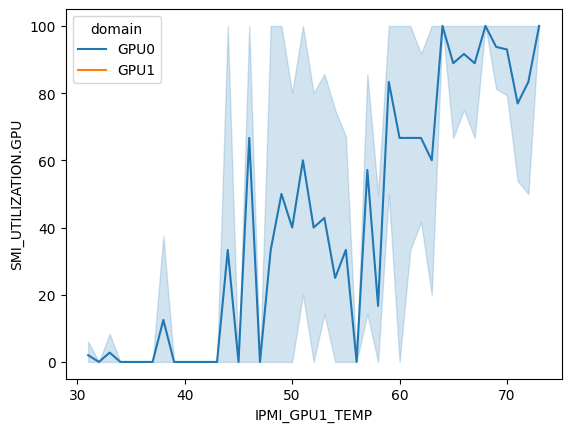

In [103]:
sns.lineplot(data=gpu_dataset, x="IPMI_GPU1_TEMP", y="SMI_UTILIZATION.GPU", hue="domain")
#sns.lineplot(data=gpu_dataset, x="IPMI_GPU8_TEMP", y="SMI_UTILIZATION.GPU", hue="domain")

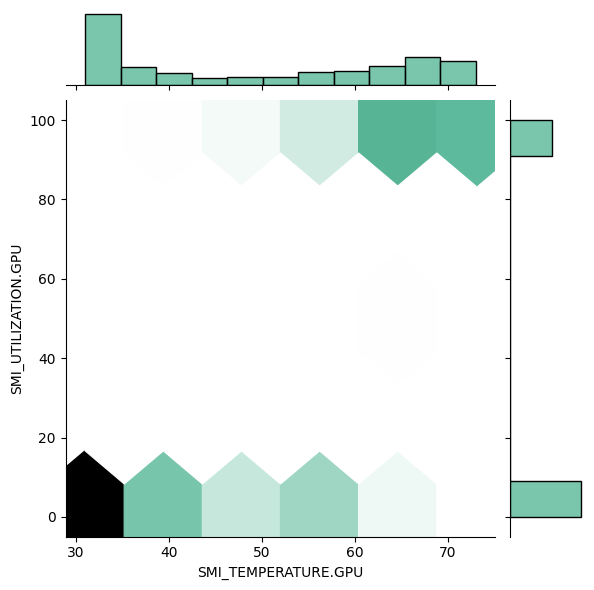

In [105]:
sns.jointplot(gpu_dataset,x="SMI_TEMPERATURE.GPU", y="SMI_UTILIZATION.GPU", kind="hex", color="#4CB391")